# Preço de Casas na California (ML)

## Importei as dependências necessárias.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Manipulação de Dados Inicial

### Importei o DataSet 'housing.csv' e verifiquei as primeiras 10 Linhas.

In [3]:
data = pd.read_csv('housing.csv')
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


### Verifiquei a estrutura do dataset.

In [4]:
data.info()
median = data['total_bedrooms'].median()
data = data.fillna(median)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  flo

O Dataset possui 9 colunas e apenas a coluna total_bedrooms possui valores nulos. Ou seja, 207 valores faltantes na coluna total_bedrooms. Esses valore sofram subtituíos pela média.

### Verifiquei  os valores numéricos via histograma.

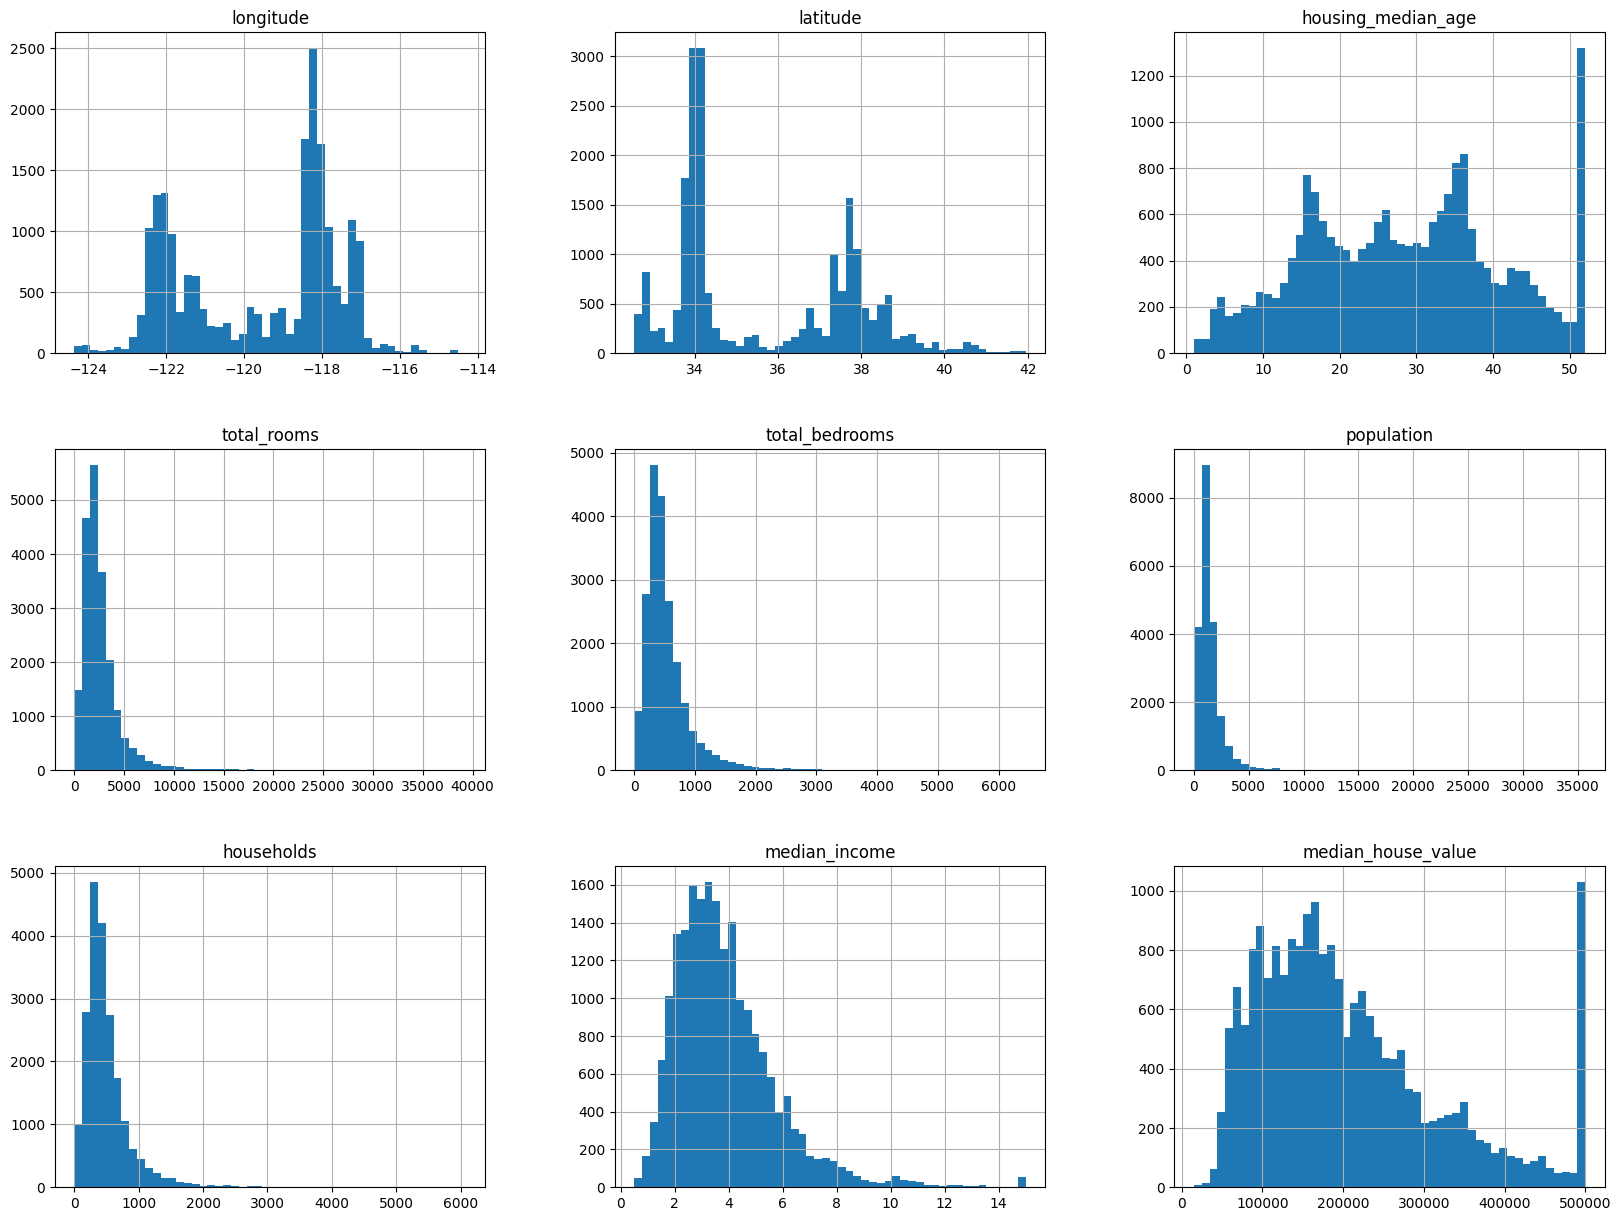

In [6]:
data.describe()
data.hist(bins=50, figsize=(20,15))
plt.show()

# Todas as Variáveis:
- longitude: Longitude da casa
- latitude: Latitude da casa
- housing_median_age: Idade média das casas na vizinhança
- total_rooms: Número total de quartos
- total_bedrooms: Número total de quartos
- population: População da vizinhança
- households: Número de famílias
- median_income: Renda média das famílias
- ocean_proximity: Localização da casa

### Variável mais importante: median_income

**A variável median_income é a mais importante para prever o valor da casa. Isso faz sentido, já que uma casa com uma renda média mais alta é provavelmente mais cara do que uma casa com uma renda média mais baixa.**

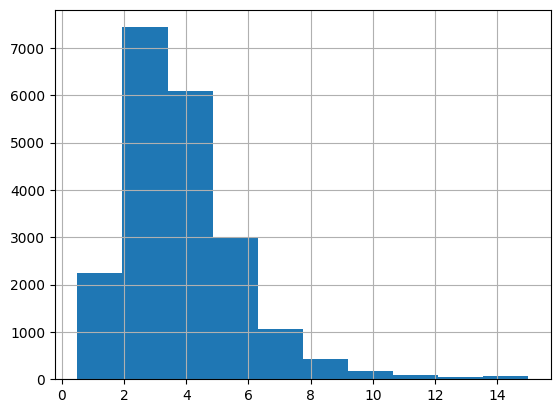

In [7]:
data['median_income'].hist()
plt.show()

### Criando categorias de renda.
- Categoria 1: 0 - 1.5
- Categoria 2: 1.5 - 3.0
- Categoria 3: 3.0 - 4.5
- Categoria 4: 4.5 - 6.0
- Categoria 5: 6.0 - Máximo

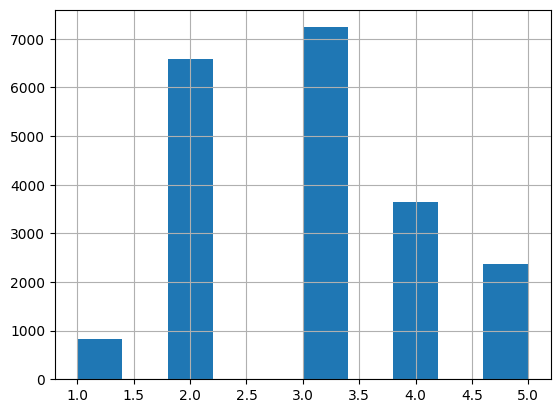

In [8]:
data['income_cat'] = pd.cut(data['median_income'], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])
data['income_cat'].hist()
plt.show()

### Categorias de renda / Preço da casa

In [ ]:
data.groupby('income_cat')['median_house_value'].mean().plot(kind='bar')
plt.ylabel('Preço da Casa ($)')
plt.xlabel('Categoria de Renda')
plt.show()

**Como esperado o preço da casa aumenta conforme a renda média da vizinhança aumenta.**

# Divisão de Dados


## Stratified Shuffle Split
Stratified Shuffle Split é uma técnica de validação cruzada (cross-validation) que é frequentemente usada para avaliar o desempenho de modelos de aprendizado de máquina. É uma variação do método de validação cruzada k-fold. A diferença é que ele embaralha (shuffle) os dados antes de dividir a amostra em k subconjuntos estratificados (stratified), onde a estratificação é feita com base em uma variável alvo, como por exemplo, uma classe em um problema de classificação.

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=29)
for train_index, test_index in split.split(data, data['income_cat']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [10]:
data['income_cat'].value_counts() / len(data)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [11]:
strat_train_set['income_cat'].value_counts() / len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

**As proporções de renda são semelhantes nos conjuntos de treinamento e teste, o que é importante para evitar viéses.**

# Amostragem

## Random Sampling
Random sampling é uma técnica de amostragem em que cada elemento da população tem uma chance igual de ser selecionado para compor a amostra. É um método simples e objetivo para a seleção de uma amostra representativa de uma população, sem qualquer viés na seleção. O objetivo da random sampling é minimizar a possibilidade de selecionar uma amostra não representativa e garantir que a amostra selecionada seja uma boa estimativa da população como um todo. Essa técnica é amplamente utilizada em estatística, pesquisa de mercado e outras áreas em que é necessário coletar informações sobre uma população para realizar análises e tomar decisões.

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=29)

## Comparando as amostras
Criei um DataFrame comparando as proporções de renda nos conjuntos de treinamento e teste gerados por amostragem estratificada e aleatória.

In [13]:
def income_cat_proportions(data):
    return data['income_cat'].value_counts() / len(data)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(data),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()

In [14]:
compare_props["Random % Error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Stratified % Error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100
compare_props

,Overall,Stratified,Random,Random % Error,Stratified % Error
1,0.039826,0.039971,0.042636,7.055961,0.364964
2,0.318847,0.318798,0.311531,-2.294484,-0.015195
3,0.350581,0.350533,0.344719,-1.672195,-0.013820
4,0.176308,0.176357,0.181686,3.050289,0.027480
5,0.114438,0.114341,0.119428,4.360711,-0.084674


**Removi a coluna income_cat para que os dados voltem ao seu estado original.**

In [15]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [16]:
data = strat_train_set.copy()

# Mapa da Califórnia

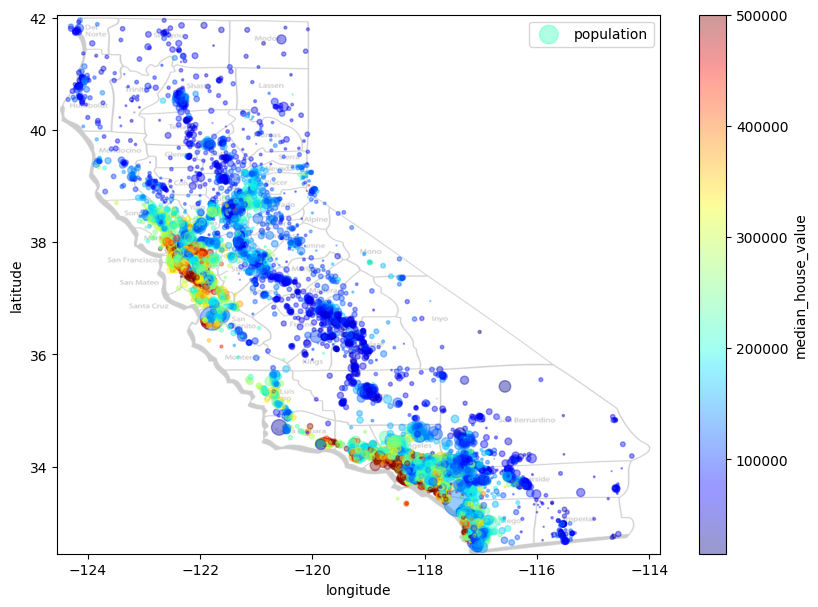

In [17]:
calimap = plt.imread('californiamap.png')

ax = data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=data["population"]/100, label="population", figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,)

plt.imshow(calimap, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.2, cmap=plt.get_cmap("jet"))

**Conseguimos concluir que as casas de maior valor (de cor vermelha) a California se encontram próximas do mar.**

## Correlação
Correlação é uma medida estatística que indica a existência de uma relação entre duas variáveis. A correlação é expressa como um número que varia de -1 a 1, onde -1 indica uma correlação negativa perfeita (quando uma variável aumenta, a outra diminui), 0 indica nenhuma correlação (as variáveis são independentes) e 1 indica uma correlação positiva perfeita (quando uma variável aumenta, a outra também aumenta).

In [18]:
corr_matrix = data.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

/tmp/ipykernel_28080/3333327041.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


median_house_value    1.000000
median_income         0.691334
total_rooms           0.127498
housing_median_age    0.108481
households            0.060161
total_bedrooms        0.043777
population           -0.028239
longitude            -0.043977
latitude             -0.146227
Name: median_house_value, dtype: float64

**A correlação entre o valor da casa e a renda média da vizinhança é de 0.69, o que é bastante forte em comparação com as outras variáveis.**

## Scatter Matrix
Scatter matrix é uma matriz de gráficos de dispersão que permite visualizar a relação entre várias variáveis em um conjunto de dados. A matriz de dispersão é composta por um conjunto de gráficos de dispersão, onde cada gráfico representa a relação entre duas variáveis do conjunto de dados. A diagonal principal da matriz de dispersão é composta por histogramas, que mostram a distribuição de cada variável.

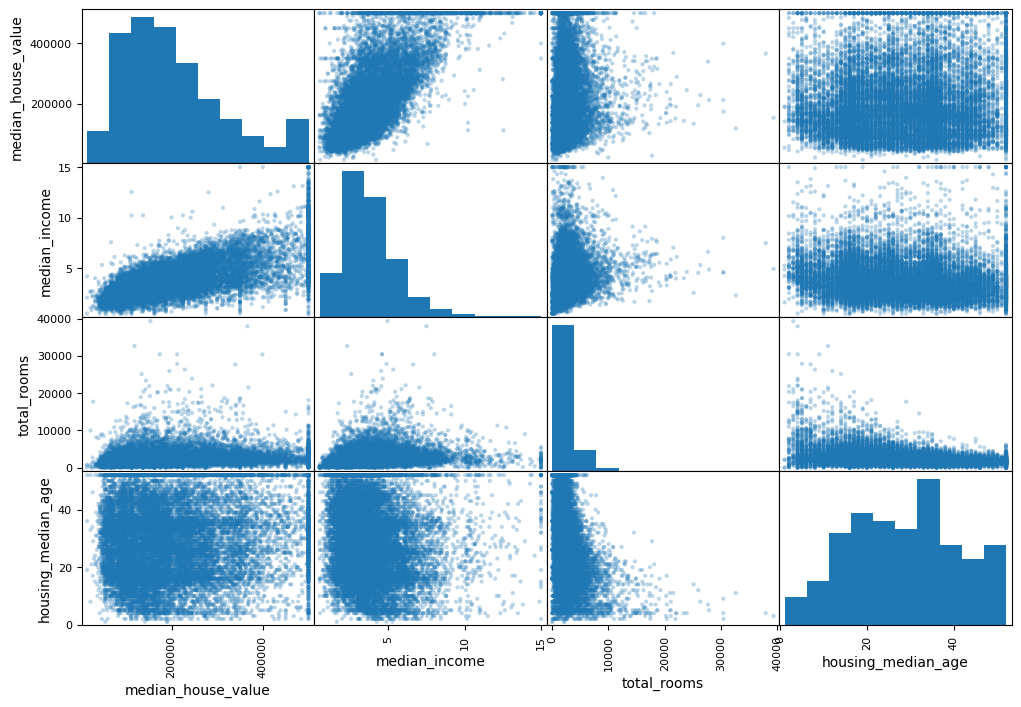

In [19]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(data[attributes], figsize=(12, 8), alpha=0.3)
plt.show()

**A renda média da vizinhança parece ser a variável mais promissora para prever o valor da casa.**

<Axes: xlabel='median_income', ylabel='median_house_value'>

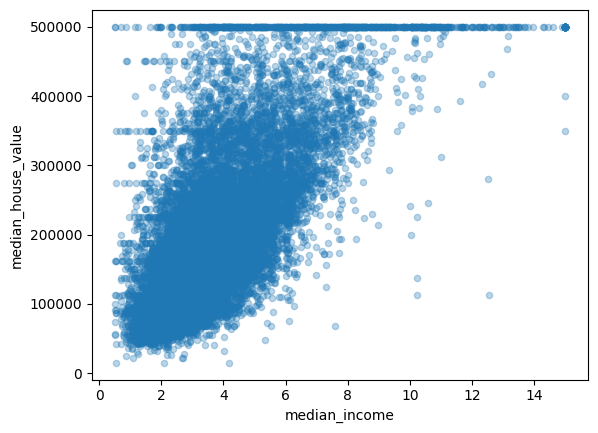

In [20]:
data.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.3)

## Feature Engineering
Feature engineering é o processo de transformar dados brutos em características que melhor representam a natureza dos dados sob análise. Essas características podem ser usadas para melhorar a eficácia de modelos de aprendizado de máquina.

In [21]:
data['rooms_per_household'] = data['total_rooms']/data['households']
data['bedrooms_per_room'] = data['total_bedrooms']/data['total_rooms']
data['population_per_household'] = data['population']/data['households']

In [22]:
corr_matrix = data.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

/tmp/ipykernel_28080/3333327041.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


median_house_value          1.000000
median_income               0.691334
rooms_per_household         0.151990
total_rooms                 0.127498
housing_median_age          0.108481
households                  0.060161
total_bedrooms              0.043777
population_per_household   -0.021681
population                 -0.028239
longitude                  -0.043977
latitude                   -0.146227
bedrooms_per_room          -0.228251
Name: median_house_value, dtype: float64

<Axes: xlabel='bedrooms_per_room', ylabel='median_house_value'>

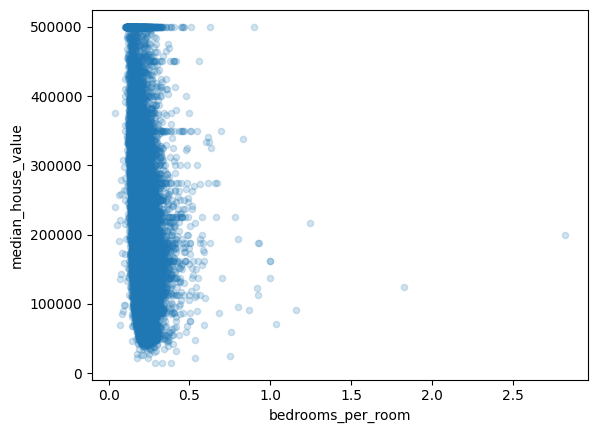

In [23]:
data.plot(kind="scatter", x="bedrooms_per_room", y="median_house_value", alpha=0.2)

**Agora a variável bedrooms_per_room tem uma correlação 'negativa' muito mais proeminente com o valor da casa, o que indica que as casas com um maior número de quartos tendem a ser mais baratas.**

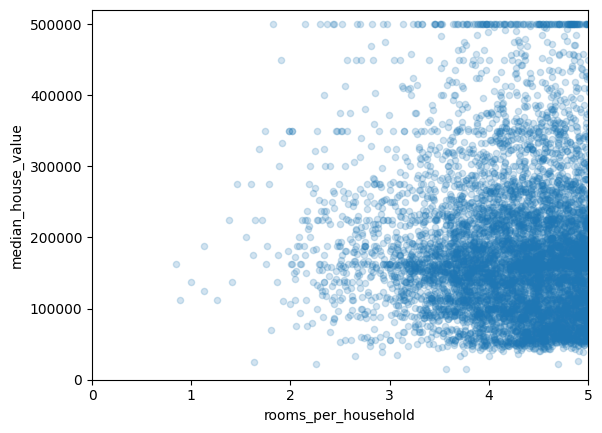

In [24]:
data.plot(kind="scatter", x="rooms_per_household", y="median_house_value", alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

**Agora a variável rooms_per_household tem uma correlação 'positiva' muito mais proeminente com o valor da casa, o que indica que as casas com um maior número de quartos tendem a ser mais caras.**

## Preparando os dados para os algoritmos de Machine Learning

In [25]:
data = strat_train_set.drop("median_house_value", axis=1)
data_labels = strat_train_set["median_house_value"].copy()

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 8007 to 230
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


## Tratando os dados faltantes utilizando Scikit-Learn Inputer

In [27]:
from sklearn.impute import SimpleImputer

imputer= SimpleImputer(strategy="median")

## Tratando valores numéricos

In [28]:
data_num = data.drop("ocean_proximity", axis=1)
imputer.fit(data_num)

SimpleImputer(strategy='median')

## Verificando os valores médios das colunas computados pelo imputer

In [29]:
imputer.statistics_

array([-118.5  ,   34.26 ,   29.   , 2123.   ,  435.   , 1159.   ,
        407.   ,    3.533])

In [30]:
data_num.median().values

array([-118.5  ,   34.26 ,   29.   , 2123.   ,  435.   , 1159.   ,
        407.   ,    3.533])

## Substituindo os valores faltantes pela mediana tratada pelo SimpleImputer

In [31]:
X = imputer.transform(data_num)

## Transformando o array numpy em um DataFrame do Pandas
Verificando novamente a existência de valores faltantes.

In [32]:
data_tr = pd.DataFrame(X, columns=data_num.columns, index=data_num.index)
data_tr[data_tr.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income


**Nenhum valor faltante encontrado.**

In [33]:
data_tr.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
8007,-118.11,33.85,36.0,887.0,163.0,482.0,157.0,4.1250
18096,-122.04,37.33,26.0,2690.0,401.0,1264.0,429.0,7.7643
5981,-117.74,34.10,29.0,2742.0,488.0,2477.0,532.0,3.5072
3669,-118.39,34.23,43.0,1193.0,299.0,1184.0,320.0,2.1518
14092,-117.11,32.76,21.0,2226.0,600.0,1085.0,533.0,2.2604
15992,-122.47,37.75,49.0,2747.0,472.0,1281.0,448.0,5.4820
10537,-117.70,33.50,4.0,7474.0,1037.0,2969.0,1007.0,8.7591
6544,-118.02,34.05,34.0,1610.0,513.0,2050.0,508.0,2.5562
948,-121.91,37.71,25.0,4377.0,668.0,2038.0,671.0,5.7233
6193,-117.90,34.09,34.0,1562.0,272.0,825.0,266.0,4.1250


## Tratando os dados categóricos

In [34]:
data_cat = data[["ocean_proximity"]]
data_cat.head(10)

,ocean_proximity
8007,<1H OCEAN
18096,<1H OCEAN
5981,INLAND
3669,<1H OCEAN
14092,NEAR OCEAN
15992,NEAR BAY
10537,<1H OCEAN
6544,<1H OCEAN
948,<1H OCEAN
6193,<1H OCEAN


## Transformando os dados categóricos em dados numéricos
Utilizando os métodos factorize() do Pandas e o  OneHotEncoder do Scikit-Learn.

In [35]:
data_cat_encoded, data_categories = data_cat["ocean_proximity"].factorize()
data_cat_encoded[:10]

array([0, 0, 1, 0, 2, 3, 0, 0, 0, 0])

In [36]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
data_cat_1hot = encoder.fit_transform(data_cat_encoded.reshape(1,-1))
data_cat_1hot

<1x16512 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

## Transformando a Matriz em Array

In [37]:
data_cat_1hot.toarray()

array([[1., 1., 1., ..., 1., 1., 1.]])

## Transformação Customizada

In [39]:
from sklearn.base import BaseEstimator, TransformerMixin

#indexes das colunas
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):

    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]

        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [40]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
data_extra_attribs = attr_adder.transform(data.values)

In [41]:
data_extra_attribs = pd.DataFrame(data_extra_attribs, columns=list(data.columns)+["rooms_per_household", "population_per_household"], index=data.index)
data_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
8007,-118.11,33.85,36.0,887.0,163.0,482.0,157.0,4.125,<1H OCEAN,5.649682,3.070064
18096,-122.04,37.33,26.0,2690.0,401.0,1264.0,429.0,7.7643,<1H OCEAN,6.270396,2.946387
5981,-117.74,34.1,29.0,2742.0,488.0,2477.0,532.0,3.5072,INLAND,5.154135,4.656015
3669,-118.39,34.23,43.0,1193.0,299.0,1184.0,320.0,2.1518,<1H OCEAN,3.728125,3.7
14092,-117.11,32.76,21.0,2226.0,600.0,1085.0,533.0,2.2604,NEAR OCEAN,4.17636,2.035647


## Pipeline de Transformação

### Pipeline para todos os tratamentos e pré-processamentos

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

data_num_tr = num_pipeline.fit_transform(data_num)

data_num_tr

array([[ 0.73060355, -0.83678622,  0.5859237 , ...,  0.08523298,
        -0.00292009, -0.4502802 ],
       [-1.22941925,  0.78729756, -0.21189695, ...,  0.33148459,
        -0.01357928, -0.97043259],
       [ 0.91513496, -0.72011354,  0.02744924, ..., -0.11136143,
         0.13376642, -0.53713329],
       ...,
       [ 0.201946  , -0.63144229, -0.85015347, ...,  0.13786673,
        -0.02720971, -0.44481237],
       [ 0.63085685, -0.73878116, -0.37146108, ..., -0.91194187,
        -0.01098173,  1.87810358],
       [-1.30921661,  1.0019753 ,  0.90505196, ..., -0.3666513 ,
        -0.02289502,  0.41542833]])

In [44]:
class DataFrameSelector (BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X[self.attribute_names].values

### Pipeline para os dados categóricos

In [45]:
from sklearn.pipeline import FeatureUnion

num_attribs = list(data_num.columns)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('cat_encoder', OneHotEncoder(sparse=False)),
])

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

data_prepared = full_pipeline.fit_transform(data)
data_prepared

/home/sidneia/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[ 0.73060355, -0.83678622,  0.5859237 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.22941925,  0.78729756, -0.21189695, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.91513496, -0.72011354,  0.02744924, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.201946  , -0.63144229, -0.85015347, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.63085685, -0.73878116, -0.37146108, ...,  0.        ,
         0.        ,  0.        ],
       [-1.30921661,  1.0019753 ,  0.90505196, ...,  0.        ,
         1.        ,  0.        ]])

## Selecionando e treinando modelos

### Treinando e avaliando um modelo de Regressão Linear
Um modelo de regressão linear é uma técnica estatística que busca estabelecer uma relação linear entre uma variável dependente e uma ou mais variáveis independentes. Essa técnica é utilizada para entender como uma variável afeta outra e prever valores futuros com base nos valores das variáveis independentes.

In [46]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(data_prepared, data_labels)

LinearRegression()

### Testando o modelo

In [47]:
some_data = data.iloc[:5]
some_labels = data_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [232056.40732036 380478.15961938 112130.77392587 157185.97577619
 182221.10115336]
Labels: [219500.0, 474700.0, 121900.0, 161600.0, 126300.0]


### Calculando o erro RMSE ou REQM
RMSE (Root Mean Squared Error, ou Raiz do Erro Quadrático Médio, em português) é a raiz quadrada do MSE. Essa métrica é útil porque retorna o erro na mesma unidade de medida que a variável dependente, o que torna mais fácil de interpretar a magnitude do erro. Como a RMSE é uma métrica mais sensível a valores discrepantes (outliers) do que a média, ela é frequentemente usada para avaliar a performance de modelos em que os outliers são um problema.

In [48]:
from sklearn.metrics import mean_squared_error

data_predictions = lin_reg.predict(data_prepared)
lin_mse = mean_squared_error(data_labels, data_predictions)
lin_rmse = np.sqrt(lin_mse)
print(f"A raiz do erro quadrátipo médio do modelo de Regressão Linear é: {lin_rmse}.")

O erro quadrátipo médio do modelo de Regressão Linear é: 67934.75705360899.


### Treinando e avaliando um modelo de Árvore de Decisão para Regressão
A árvore de decisão para regressão é uma técnica de aprendizado de máquina que usa uma árvore de regras para prever valores contínuos.

In [49]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(data_prepared, data_labels)

DecisionTreeRegressor()

### Testando o modelo de Árvore de Decisão e o erro RMSE ou EQM

In [50]:
data_predictions = tree_reg.predict(data_prepared)
tree_mse = mean_squared_error(data_labels, data_predictions)
tree_rmse = np.sqrt(tree_mse)
print(f"A raiz do erro quadrátipo médio do modelo de Árvore de Decisão para Regressão é: {tree_rmse}.")

O erro quadrátipo médio do modelo de Árvore de Decisão para Regressão é: 0.0.


### Treinando e avaliando um modelo de Floresta Aleatória
O Random Forest Regressor é um modelo de aprendizado de máquina usado para prever valores contínuos a partir de um conjunto de variáveis independentes. Ele é uma extensão do Random Forest Classifier, mas em vez de prever classes, ele prevê valores numéricos.

In [54]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(data_prepared, data_labels)

RandomForestRegressor()

### Testando o modelo e encontrando o erro RMSE ou EQM

In [55]:
data_predictions = forest_reg.predict(data_prepared)
forest_mse = mean_squared_error(data_labels, data_predictions)
forest_rmse = np.sqrt(forest_mse)
print(f"A raiz do erro quadrátipo médio do modelo de Floresta Aleatória é: {forest_rmse}.")

O erro quadrátipo médio do modelo de Floresta Aleatória é: 18423.81845160331.


## Avaliando o modelo usando Pontuação de Validação Cruzada
O Cross-Validation Score (ou Pontuação de Validação Cruzada, em português) é uma métrica usada para avaliar a performance de um modelo de aprendizado de máquina. Ele é usado para verificar a capacidade do modelo de generalizar para novos dados e evitar o overfitting. Ele funciona dividindo o conjunto de dados em várias partes chamadas de "folds". O modelo é treinado em cada um dos folds, enquanto os outros são usados como conjunto de validação. O processo é repetido várias vezes, com cada fold sendo usado como conjunto de validação uma vez. Em seguida, a pontuação é calculada como a média das pontuações de cada fold.

In [56]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, data_prepared, data_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
print(f"A pontuação do Moledo de Árvore de Decisão para Regressão é: {tree_rmse_scores}.")

A pontuação do Moledo de Árvore de Decisão para Regressão é: [68915.71895729 70415.53929618 70661.29756633 72241.90056256
 67160.08123592 71438.07318301 71029.07607379 70441.83257333
 74160.77611704 71061.71455344].


### Visualizando os resultados

In [57]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [58]:
display_scores(tree_rmse_scores)

Scores: [68915.71895729 70415.53929618 70661.29756633 72241.90056256
 67160.08123592 71438.07318301 71029.07607379 70441.83257333
 74160.77611704 71061.71455344]
Mean: 70752.6010118882
Standard deviation: 1759.95427221237


# Ajuste fino de Modelo

In [59]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(data_prepared, data_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

### Visualizando as melhores combinações de  hiperparametros

In [60]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

### Visualizando o melhor estimador

In [61]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [62]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63482.44831550898 {'max_features': 2, 'n_estimators': 3}
54404.56723751935 {'max_features': 2, 'n_estimators': 10}
52425.326221922405 {'max_features': 2, 'n_estimators': 30}
59922.81980808257 {'max_features': 4, 'n_estimators': 3}
52281.43834418854 {'max_features': 4, 'n_estimators': 10}
49697.75206841315 {'max_features': 4, 'n_estimators': 30}
59693.5083648468 {'max_features': 6, 'n_estimators': 3}
51111.82665976314 {'max_features': 6, 'n_estimators': 10}
49373.788121070684 {'max_features': 6, 'n_estimators': 30}
58245.075957400724 {'max_features': 8, 'n_estimators': 3}
51696.65372049282 {'max_features': 8, 'n_estimators': 10}
49118.06563867193 {'max_features': 8, 'n_estimators': 30}
61570.0008142487 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53299.59797700736 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60033.263292578784 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51745.691295520555 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [65]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = cat_pipeline.named_steps["cat_encoder"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.36117684716658693, 'median_income'),
 (0.16046446407735848, 'INLAND'),
 (0.1049343618972889, 'pop_per_hhold'),
 (0.07127978497758576, 'longitude'),
 (0.06776504819231213, 'bedrooms_per_room'),
 (0.06443773609906565, 'latitude'),
 (0.0531348048169648, 'rooms_per_hhold'),
 (0.04190951801716877, 'housing_median_age'),
 (0.015167399266296806, 'population'),
 (0.014347311074226451, 'total_rooms'),
 (0.014297930016631896, 'total_bedrooms'),
 (0.013463278597810522, 'households'),
 (0.008853825891791282, '<1H OCEAN'),
 (0.00531909375743439, 'NEAR OCEAN'),
 (0.003221956241855745, 'NEAR BAY'),
 (0.00022663990962146463, 'ISLAND')]

## Avaliando o sistema no conjunto de teste

In [66]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(f"A raiz do erro quadrátipo médio do modelo de Floresta Aleatória é: {final_rmse}.")

O erro quadrátipo médio do modelo de Floresta Aleatória é: 50526.428020030784.


## Exibindo a confiança do modelo

In [67]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([48093.76403637, 52847.22999118])

## Exibindo o erro absoluto médio

In [68]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, final_predictions)
print(f"O erro absoluto médio do modelo de Floresta Aleatória é: {mae}.")

O erro absoluto médio do modelo de Floresta Aleatória é: 32769.985715439274.
